In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

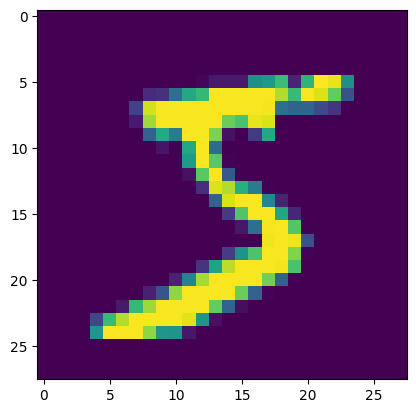

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train, x_test = x_train[...,np.newaxis]/255.0, x_test[...,np.newaxis]/255.0

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
from keras.models import Sequential
from sklearn.decomposition import PCA
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



2023-01-14 16:33:34.494668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 21s 11ms/step - loss: 0.1539 - accuracy: 0.9541 - val_loss: 0.0617 - val_accuracy: 0.9827
Epoch 2/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0506 - accuracy: 0.9846 - val_loss: 0.0503 - val_accuracy: 0.9853
Epoch 3/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0474 - val_accuracy: 0.9870
Epoch 4/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0486 - val_accuracy: 0.9880
Epoch 5/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.0512 - val_accuracy: 0.9895
Epoch 6/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.0528 - val_accuracy: 0.9882
Epoch 7/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0074 - accuracy: 0.9975 - val_loss: 0.0647 -

In [12]:
output = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [31]:
output_one = np.argmax(output, axis=1)

In [13]:
y_test_labels = np.argmax(y_test, axis=1)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test_labels, output_one)

In [39]:
import pandas as pd
import seaborn as sns

<AxesSubplot:>

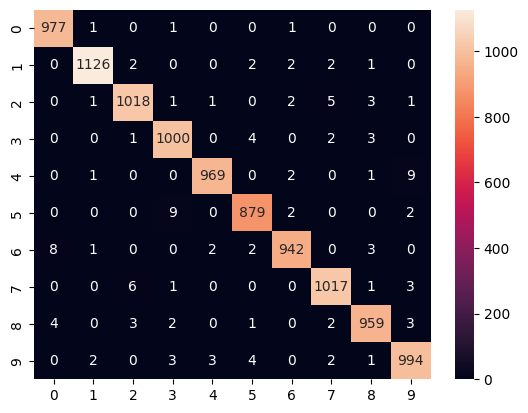

In [36]:
sns.heatmap(confusion_mat, annot = True, fmt = "d")

In [14]:
color_list = ['blue', 'green', 'yellow', 'brown', 'black', 'cyan', 'orange', 'olive', 'purple', 'pink']
color_map = {i: color_list[i] for i in range(10)}

colors = [color_map[y] for y in y_test_labels]

In [38]:
pca = PCA(n_components=2)
pca_output = pca.fit_transform(output)

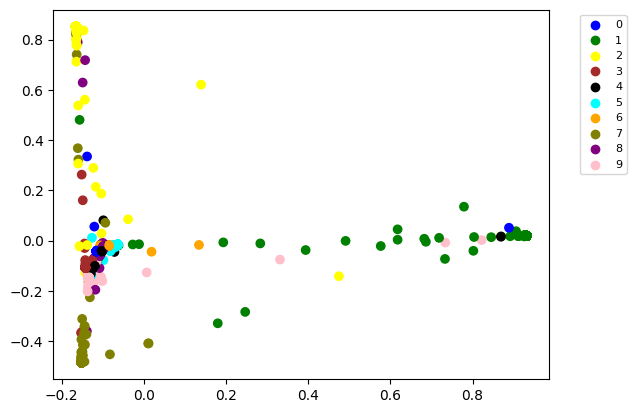

In [16]:
scatter = plt.scatter(pca_output[:, 0], pca_output[:, 1], c=colors)

for i in range(10):
    plt.scatter([], [], c=color_map[i], label=str(i))
plt.legend(scatterpoints=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.show()

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
tsne_output = tsne.fit_transform(output)

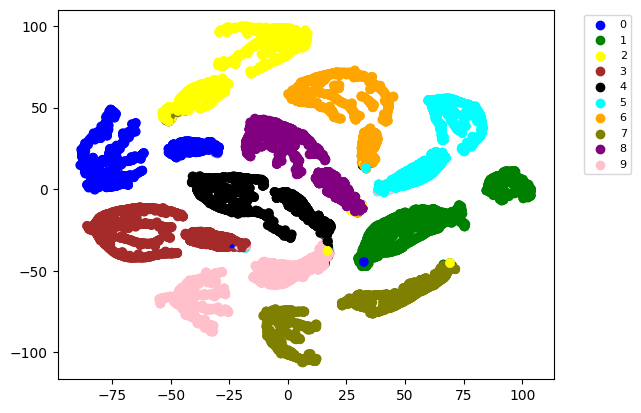

In [18]:
plt.scatter(tsne_output[:, 0], tsne_output[:, 1], c=colors)

for i in range(10):
    plt.scatter([], [], c=color_map[i], label=str(i))
plt.legend(scatterpoints=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.show()

In [40]:
from keras.models import Model

pca_model = Model(inputs=model.input, outputs=model.layers[-2].output)

In [42]:
pred_pca = pca_model.predict(x_test)

313/313 [==============================] - 1s 5ms/step


In [43]:
pca = PCA(n_components=2)
pca_output = pca.fit_transform(pred_pca)

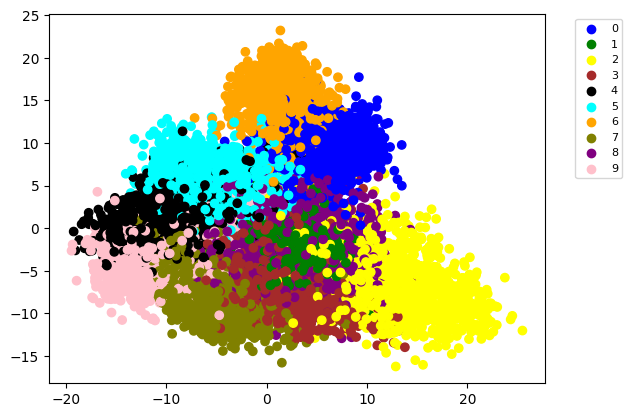

In [44]:
scatter = plt.scatter(pca_output[:, 0], pca_output[:, 1], c=colors)

for i in range(10):
    plt.scatter([], [], c=color_map[i], label=str(i))
plt.legend(scatterpoints=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.show()

In [46]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
tsne_output = tsne.fit_transform(pred_pca)

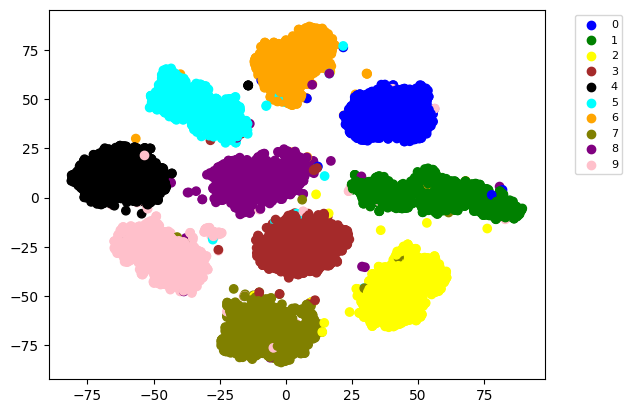

In [47]:
plt.scatter(tsne_output[:, 0], tsne_output[:, 1], c=colors)

for i in range(10):
    plt.scatter([], [], c=color_map[i], label=str(i))
plt.legend(scatterpoints=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.show()